# SciAnalysis notebook 

to run:<br>
execute cell 1 (loads cal etc.)<br>
edit directories (input_dir output_dir) in cell 2 <br>
edit 'pattern' to select files of coherent series <br>
and execute<br>
execute cells 3, 4 & 5<br>
This will show one image to confirm that the calibration params are sensible<br>
cell 6 loads all the data and takes a out-of-plane sector cut<br>
cell 7 plots the cut as a overlayed line cut and heat map<br>\

cell 8 is playgorund to tweak plot parameters to make it pretty without reloading (re-running cell 6)<br>




## 1) runXS.py

Example protocals:
    
> * thumbnails(crop=None, resize=1.0, blur=None, cmap=cmap_vge, ztrim=[0.01, 0.001]) ,
> * circular_average(ylog=True, plot_range=[0, 0.12, None, None], gridlines=True) , 
> * qr_image(blur=None, plot_range=[None, None, 0, None], _xticks=[0, 0.5, 1.0, 1.5], colorbar=True),
> * q_phi_image(bins_relative=0.25, plot_range=[0, 3.0, 0, +90]) ,
> * metadata_extract()  


## Set calibration params
on 3-2-2023 these are approx<br>
ldd is right by Nika


In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

%matplotlib inline

# Imports
########################################

import sys, os
SciAnalysis_PATH='/nsls2/data/cms/legacy/xf11bm/software/SciAnalysis/'
SciAnalysis_PATH in sys.path or sys.path.append(SciAnalysis_PATH)

import glob
from SciAnalysis import tools
from SciAnalysis.XSAnalysis.Data import *
from SciAnalysis.XSAnalysis import Protocols



# Define some custom analysis routines
########################################
# TBD

# Pilatus 300 k is?

# Experimental parameters
########################################

# calibration = Calibration(wavelength_A=0.9184) # 13.5 keV
calibration = Calibration(wavelength_A=12.4/12.7) # 12.7 keV
# calibration.set_image_size(1475, height=1679) # Pilatus2M
# calibration.set_image_size(487, height=619) # Pilatus300k
calibration.set_image_size(981, height=1043) # Pilatus800k

calibration.set_pixel_size(pixel_size_um=172.0)
#calibration.set_beam_position(765.0, 1680-579) # SAXSx -60, SAXSy -71
#calibration.set_beam_position(372.354, 586.107) # Pilatus 300k

calibration.set_beam_position(576, 1043-390) # Pilatus 800k x=450 y=398 works in xi-cam, in scianalysis need y=1043-398=645

#calibration.set_distance(5.038) # 5m
#calibration.set_distance(2.001) # 2m
#calibration.set_distance(.16045) # 300k
calibration.set_distance(.258) # 300k


mask_dir = SciAnalysis_PATH + '/SciAnalysis/XSAnalysis/masks/'
#mask = Mask(mask_dir+'Dectris/Pilatus2M_gaps-mask.png')
mask = Mask(mask_dir+'Dectris/Pilatus800k2_gaps-mask.png')
mask.load('./Pilatus800k2_custom-mask.png')


In [18]:
def foo(name):
    return(name.split('_')[-2])

# Files to analyze
########################################
#source_dir = 'M:/Data/NSLS-II CMS data/2020-Dec/LRichter10/MM389_KClO4/maxs/raw/'
#output_dir = 'M:/Data/NSLS-II CMS data/2020-Dec/LRichter10/MM389_KClO4/analysis/'
source_dir ='/nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter3/waxs/raw/'
output_dir ='/nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter3/waxs/analysis/'


pattern = '*pos1*'

infiles = glob.glob(os.path.join(source_dir, pattern+'.tiff'))
# print(len(infiles))

# for i,file in enumerate(infiles):
#     if 'sixth' in file:
#         infiles.remove(file)
# print('after first cull',len(infiles))
        
# for i,file in enumerate(infiles):
#     if 'seventh' in file:
#         infiles.remove(file)
# print('after second cull', len(infiles))        

# for i, file in enumerate(infiles):
#     if '8thtry' in file:
#         infiles.remove(file)
        
# print(' after third cull ',len(infiles))

infiles.sort(key=lambda x:foo(x))

print(infiles[0])
print(infiles[-1])
print(len(infiles))
# for file in infiles:
#      print(file)

/nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter3/waxs/raw/NS_PBTTT_15_pos1_x-0.000_y0.000_10.00s_1088296_waxs.tiff
/nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter3/waxs/raw/DFS_trans_M2_pos1_x0.000_y0.000_10.00s_1088635_waxs.tiff
82


0 is out-of-plan, 90 in-plane

In [19]:
# Analysis to perform
########################################

load_args = { 'calibration' : calibration, 
             'mask' : mask,
             }
run_args = { 'verbosity' : 3,
            }

process = Protocols.ProcessorXS(load_args=load_args, run_args=run_args)


# Examples:
#protocols = [ Protocols.circular_average_q2I(plot_range=[0, 0.2, 0, None]) ]
#protocols = [ Protocols.linecut_angle(q0=0.01687, dq=0.00455*1.5, show_region=False) ]
#protocols = [ Protocols.q_image(blur=1.0, bins_relative=0.5, plot_range=[-0.1, 3.0, 0, 3.0], _xticks=[0, 1.0, 2.0, 3.0], ztrim=[0.2, 0.01]) ]
#protocols = [ Protocols.qr_image(blur=1.0, bins_relative=0.5, plot_range=[-0.1, 3.0, 0, 3.0], _xticks=[0, 1.0, 2.0, 3.0], zmin=1010., ztrim=[None, 0.01]) ]
#protocols = [ Protocols.qr_image(blur=None, bins_relative=0.8, plot_range=[-0.1, 3.0, 0, 3.0], _xticks=[0, 1.0, 2.0, 3.0], ztrim=[0.38, 0.002], dezing_fill=True) ]
#protocols = [ Protocols.q_phi_image(bins_relative=0.25, plot_range=[0, 3.0, 0, +90]) ]
#Protocols.sector_average(name='sector_average_angle70', angle=70, dangle=13, plot_range=[1.2, 3.7, 0, 1200], show_region=1, transparent=False, gridlines=True),


protocols = [
    #Protocols.calibration_check(show=False, AgBH=True, q0=0.010, num_rings=4, ztrim=[0.05, 0.05], ) ,
    # Protocols.sector_average(name='sector_average_angle0', angle=0, dangle=15, plot_range=[0, 3.5, None, None], gridlines=True),
    # Protocols.sector_average(name='sector_average_angle90', angle=90, dangle=15, plot_range=[0, 3.5, None, None], gridlines=True),
    # Protocols.sector_average(name='sector_average_anglen90', angle=-90, dangle=15, plot_range=[0, 3.5, None, None], gridlines=True),
    Protocols.circular_average(ylog=True, plot_range=[0, 2.5, None, None], gridlines=True) ,
    Protocols.q_image(blur=None, plot_range=[None, None, None, None], _xticks=[0, 0.5, 1.0, 1.5], colorbar=True, Show=True),
    #Protocols.q_phi_image(bins_relative=1., plot_range=[0, 2.5, -90, 90]), #what is bins relative 1. is too fine
    #Protocols.thumbnails(crop=None, resize=1.0, blur=None, cmap=cmap_vge, ztrim=[0.01, 0.001]) ,    
    #Protocols.metadata_extract() 
    ]
    


# 

In [22]:
%%time
#Run
########################################
print('Processing {} infiles...'.format(len(infiles)))
process.run(infiles, protocols, output_dir=output_dir, force=1)

Processing 82 infiles...
Running sector_average_angle0 for NS_PBTTT_15_pos1_x-0.000_y0.000_10.00s_1088296_waxs
  DB locked (attempt 1); retrying...
Running sector_average_angle90 for NS_PBTTT_15_pos1_x-0.000_y0.000_10.00s_1088296_waxs
  DB locked (attempt 1); retrying...
Running sector_average_anglen90 for NS_PBTTT_15_pos1_x-0.000_y0.000_10.00s_1088296_waxs
  DB locked (attempt 1); retrying...
Running q_image for NS_PBTTT_15_pos1_x-0.000_y0.000_10.00s_1088296_waxs
  DB locked (attempt 1); retrying...
Running sector_average_angle0 for NS_PBTTT_15_pos1_x-0.000_y0.000_10.00s_1088297_waxs
  DB locked (attempt 1); retrying...
Running sector_average_angle90 for NS_PBTTT_15_pos1_x-0.000_y0.000_10.00s_1088297_waxs
  DB locked (attempt 1); retrying...
Running sector_average_anglen90 for NS_PBTTT_15_pos1_x-0.000_y0.000_10.00s_1088297_waxs
Running q_image for NS_PBTTT_15_pos1_x-0.000_y0.000_10.00s_1088297_waxs
Running sector_average_angle0 for NS_PBTTT_14_pos1_x0.000_y0.000_10.00s_1088299_waxs
Ru

/nsls2/data/cms/legacy/xf11bm/software/SciAnalysis/SciAnalysis/Data.py:2037: RuntimeWarning: invalid value encountered in log
  Z = log_gamma*np.log(Z*c + 1)


Running sector_average_angle0 for DFS_trans_BSM6_pos1_x0.000_y0.000_10.00s_1088470_waxs
Running sector_average_angle90 for DFS_trans_BSM6_pos1_x0.000_y0.000_10.00s_1088470_waxs
Running sector_average_anglen90 for DFS_trans_BSM6_pos1_x0.000_y0.000_10.00s_1088470_waxs
Running q_image for DFS_trans_BSM6_pos1_x0.000_y0.000_10.00s_1088470_waxs
Running sector_average_angle0 for DFS_trans_BSM7_pos1_x-0.000_y0.000_10.00s_1088472_waxs
Running sector_average_angle90 for DFS_trans_BSM7_pos1_x-0.000_y0.000_10.00s_1088472_waxs
Running sector_average_anglen90 for DFS_trans_BSM7_pos1_x-0.000_y0.000_10.00s_1088472_waxs
Running q_image for DFS_trans_BSM7_pos1_x-0.000_y0.000_10.00s_1088472_waxs
Running sector_average_angle0 for DFS_trans_BSM8_pos1_x-0.000_y0.000_10.00s_1088474_waxs
Running sector_average_angle90 for DFS_trans_BSM8_pos1_x-0.000_y0.000_10.00s_1088474_waxs
Running sector_average_anglen90 for DFS_trans_BSM8_pos1_x-0.000_y0.000_10.00s_1088474_waxs
Running q_image for DFS_trans_BSM8_pos1_x-0.

THis is the an example, run by setting pattern to 833995

/nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter3/waxs/raw/NS_PBTTT_15_pos1_x-0.000_y0.000_10.00s_1088296_waxs.tiff
82


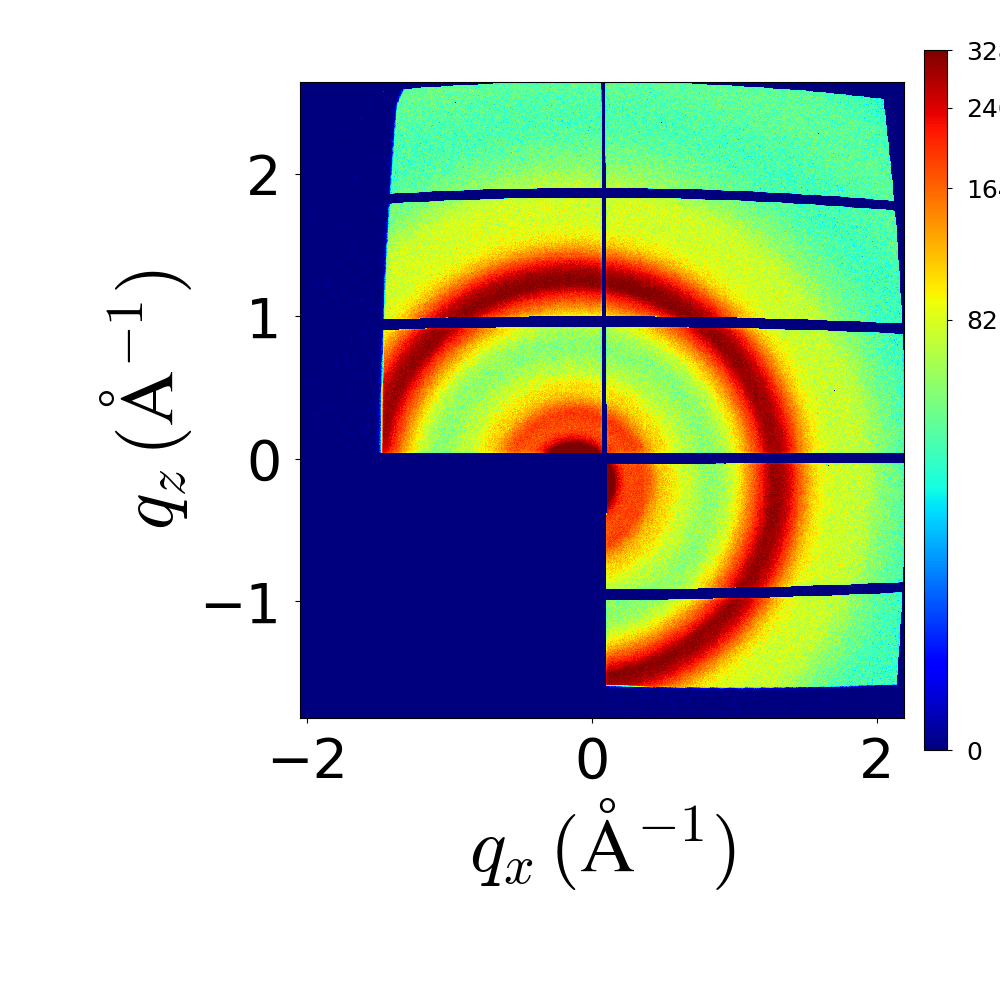

In [21]:
#If you want it on a "Code" cell.
from IPython. display import Image
image_dir=output_dir+'q_image'
img_infiles = glob.glob(os.path.join(image_dir, pattern+'.png'))
img_infiles.sort()
#print(infiles)
print(infiles[0])
print(len(infiles))

Image(img_infiles[-1],width=600)

### Analyze file without saving

In [25]:
load_args = { 'calibration' : calibration, 
             'mask' : mask,
             #'rot180' : False,
             #'flip' : True, # PSCCD
             }
run_args = { 'verbosity' : 3,
            #'save_results' : ['xml', 'plots', 'txt', 'hdf5'],
            }

process = Protocols.ProcessorXS(load_args=load_args, run_args=run_args)

shortfiles=[]
for file in infiles:
    if 'try' not in file and 'LJR' in file:
        shortfiles.append(file)

line_sector = [] ### CHANGE THIS
Nfile = len(shortfiles)
print(Nfile)

import time
t0 = time.time()

for ii, infile in enumerate(shortfiles):
    if np.mod(ii, 200)==0:
        print('[{:0.0f}%]'.format(ii/Nfile*100))
    #data = process.load(source_dir+infile+'_'+exp.det+'.tiff', calibration=calibration, mask=mask, run_args=run_args)
    
    data = process.load(infile, calibration=calibration, mask=mask, run_args=run_args)
    line_output = data.sector_average_q_bin(angle=0, dangle=15)  #line_output.x; line_output.y

    line_sector.append(line_output)

    
print('Done! Took {:.0f}s'.format(time.time()-t0)) 

20
[0%]
Done! Took 0s


In [26]:
for i,file in enumerate(shortfiles):
    print(i,file)

0 /nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter2/waxs/raw/LJR_Reg_100_AS_pos1_x-0.000_th0.120_10.00s_1085953_waxs.tiff
1 /nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter2/waxs/raw/LJR_Reg_90_10k_10_AS_pos1_x-0.000_th0.120_10.00s_1085961_waxs.tiff
2 /nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter2/waxs/raw/LJR_Reg_75_10k_25_AS_pos1_x-0.000_th0.120_10.00s_1085969_waxs.tiff
3 /nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter2/waxs/raw/LJR_Reg_55_10k_45_AS_pos1_x-0.000_th0.120_10.00s_1085977_waxs.tiff
4 /nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter2/waxs/raw/LJR_Reg_90_100k_10_AS_pos1_x-0.000_th0.120_10.00s_1085985_waxs.tiff
5 /nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter2/waxs/raw/LJR_Reg_75_100k_25_AS_pos1_x-0.000_th0.120_10.00s_1085993_waxs.tiff
6 /nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter2/waxs/raw/LJR_Reg_55_100k_45_AS_pos1_x0.000_th0.120_10.00s_1086001_waxs.tiff
7 /nsls2/data/cms/legacy/xf11bm/data/2023_2/LRichter2/waxs/raw/LJR_Reg_90_1M_10_AS_pos1_x0.000

New style, on sector, 312s for 3600 cf 

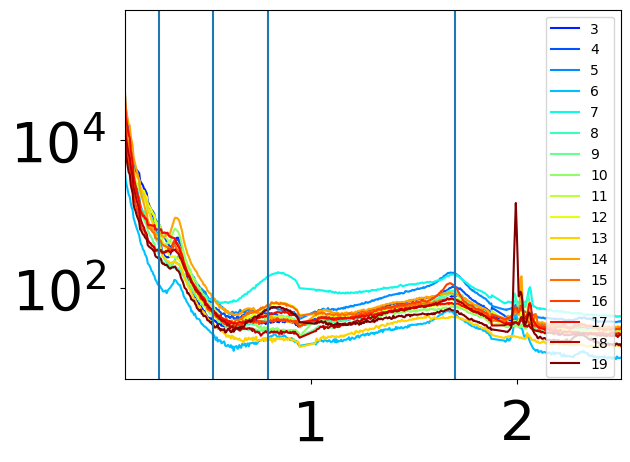

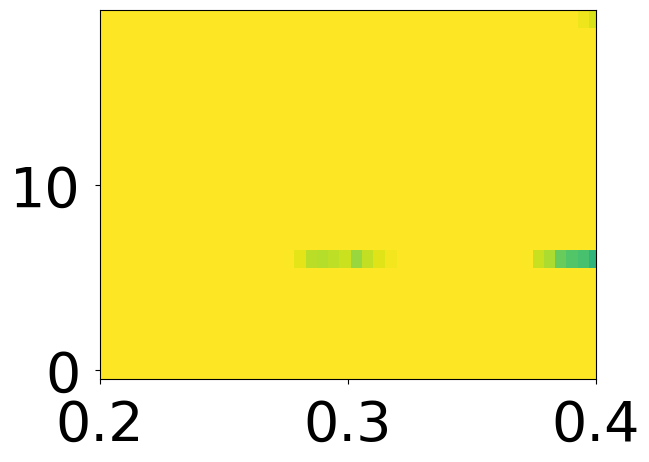

In [27]:
### Put analysis results into array downstream analysis/visualization
%matplotlib inline 
from matplotlib import colors as colors

plt.figure(10); plt.clf()
Iq_array= []
cmap = mpl.colormaps['jet']  #viridis, jet, hsv, PiYG
colors_custom = cmap(np.linspace(0.0, 1.0, len(line_sector)))
vertical_spacing = 2 #arbitrary

for nn, line in enumerate(line_sector):
    q_array = line_sector[nn].x    
    Iq_array.append(line_sector[nn].y)
    if (nn >=3 ):
#        plt.plot(q_array, Iq_array[nn] + nn*vertical_spacing/100, color=colors_custom[nn])
        plt.plot(q_array, Iq_array[nn], color=colors_custom[nn],label=nn)
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()
    
np_Iq_array = np.array(Iq_array)

plt.figure()
yaxis=np.arange(len(Iq_array))
plt.pcolormesh(q_array,yaxis,Iq_array,norm=colors.Normalize(vmin=1,vmax=100))
plt.xlim(.2,.4)
#plt.imshow(Iq_array)
plt.show()



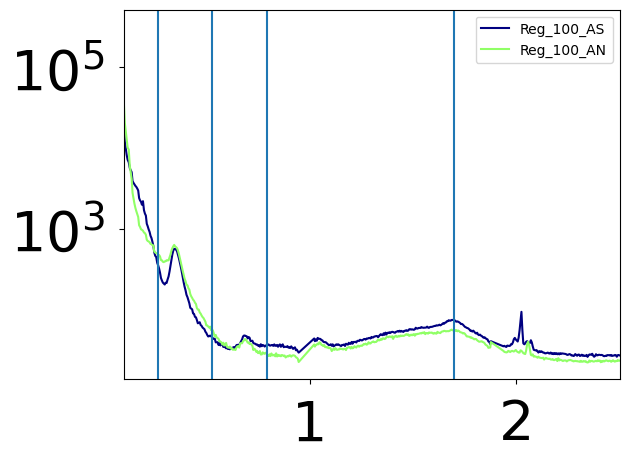

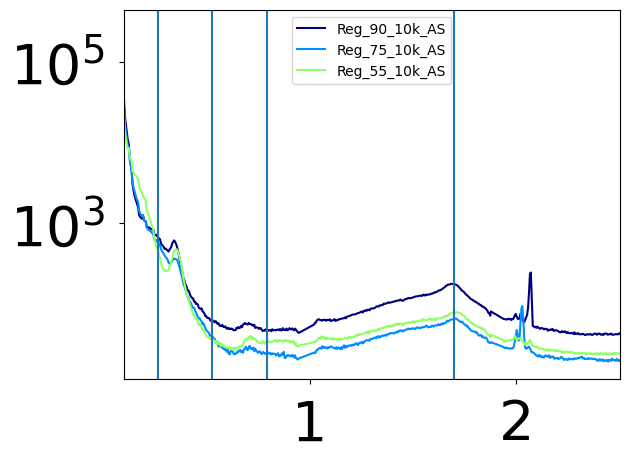

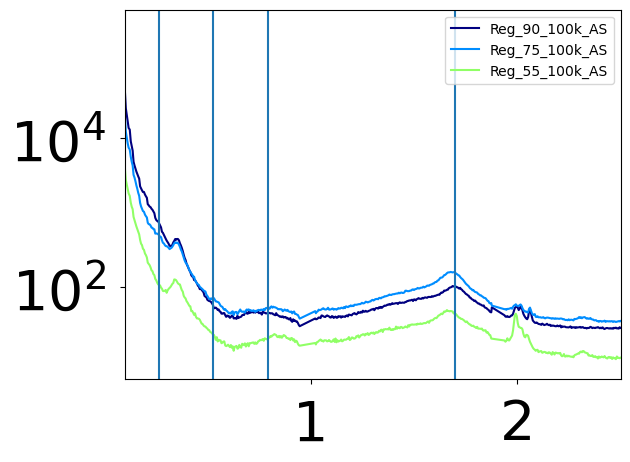

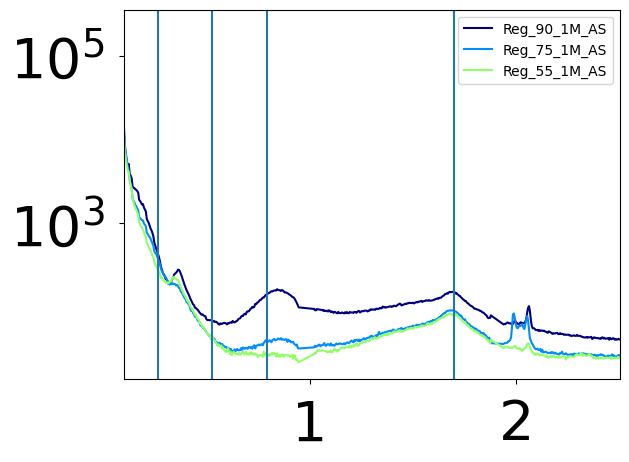

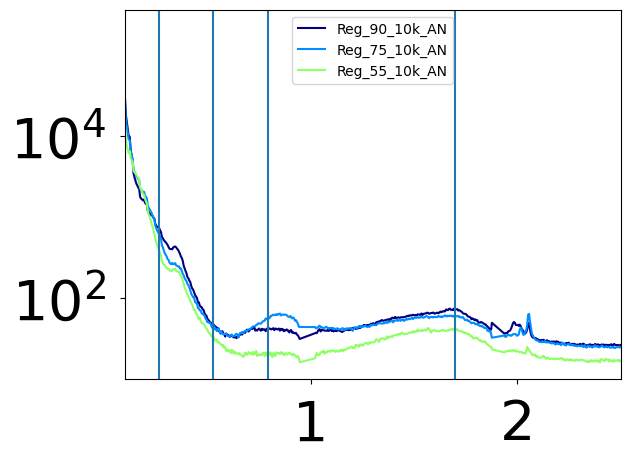

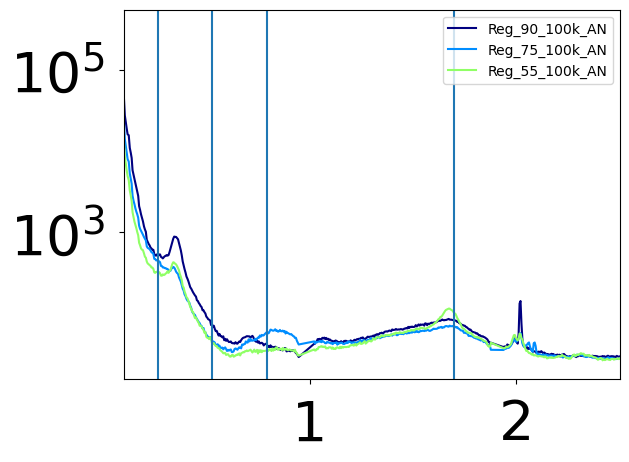

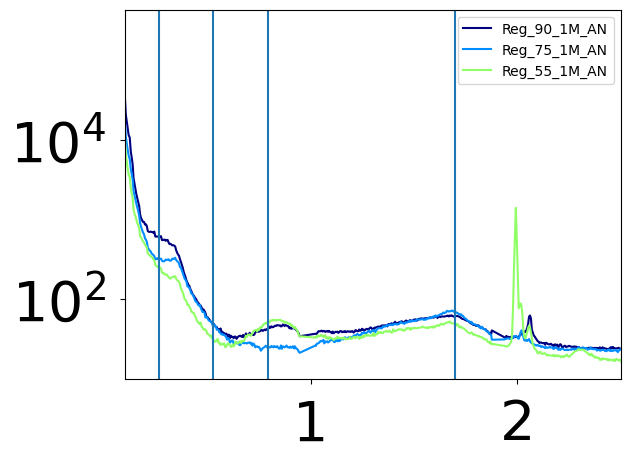

In [36]:
plt.figure()
plt.plot(q_array, Iq_array[0], color=colors_custom[0],label='Reg_100_AS')
plt.plot(q_array, Iq_array[10], color=colors_custom[10],label='Reg_100_AN')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[1], color=colors_custom[0],label='Reg_90_10k_AS')
plt.plot(q_array, Iq_array[2], color=colors_custom[5],label='Reg_75_10k_AS')
plt.plot(q_array, Iq_array[3], color=colors_custom[10],label='Reg_55_10k_AS')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[4], color=colors_custom[0],label='Reg_90_100k_AS')
plt.plot(q_array, Iq_array[5], color=colors_custom[5],label='Reg_75_100k_AS')
plt.plot(q_array, Iq_array[6], color=colors_custom[10],label='Reg_55_100k_AS')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[7], color=colors_custom[0],label='Reg_90_1M_AS')
plt.plot(q_array, Iq_array[8], color=colors_custom[5],label='Reg_75_1M_AS')
plt.plot(q_array, Iq_array[9], color=colors_custom[10],label='Reg_55_1M_AS')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[11], color=colors_custom[0],label='Reg_90_10k_AN')
plt.plot(q_array, Iq_array[12], color=colors_custom[5],label='Reg_75_10k_AN')
plt.plot(q_array, Iq_array[13], color=colors_custom[10],label='Reg_55_10k_AN')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[14], color=colors_custom[0],label='Reg_90_100k_AN')
plt.plot(q_array, Iq_array[15], color=colors_custom[5],label='Reg_75_100k_AN')
plt.plot(q_array, Iq_array[16], color=colors_custom[10],label='Reg_55_100k_AN')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[17], color=colors_custom[0],label='Reg_90_1M_AN')
plt.plot(q_array, Iq_array[18], color=colors_custom[5],label='Reg_75_1M_AN')
plt.plot(q_array, Iq_array[19], color=colors_custom[10],label='Reg_55_1M_AN')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()
    
    


In [38]:
load_args = { 'calibration' : calibration, 
             'mask' : mask,
             #'rot180' : False,
             #'flip' : True, # PSCCD
             }
run_args = { 'verbosity' : 3,
            #'save_results' : ['xml', 'plots', 'txt', 'hdf5'],
            }

process = Protocols.ProcessorXS(load_args=load_args, run_args=run_args)

shortfiles=[]
for file in infiles:
    if 'try' not in file and 'LJR_' in file:
        shortfiles.append(file)

line_sector = [] ### CHANGE THIS
Nfile = len(shortfiles)
print(Nfile)

import time
t0 = time.time()

for ii, infile in enumerate(shortfiles):
    if np.mod(ii, 200)==0:
        print('[{:0.0f}%]'.format(ii/Nfile*100))
    #data = process.load(source_dir+infile+'_'+exp.det+'.tiff', calibration=calibration, mask=mask, run_args=run_args)
    
    data = process.load(infile, calibration=calibration, mask=mask, run_args=run_args)
    line_output = data.sector_average_q_bin(angle=60, dangle=15)  #line_output.x; line_output.y

    line_sector.append(line_output)

    
print('Done! Took {:.0f}s'.format(time.time()-t0)) 

20
[0%]
Done! Took 0s


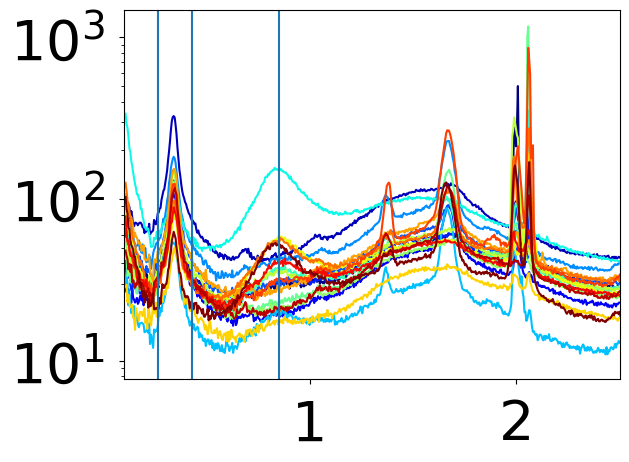

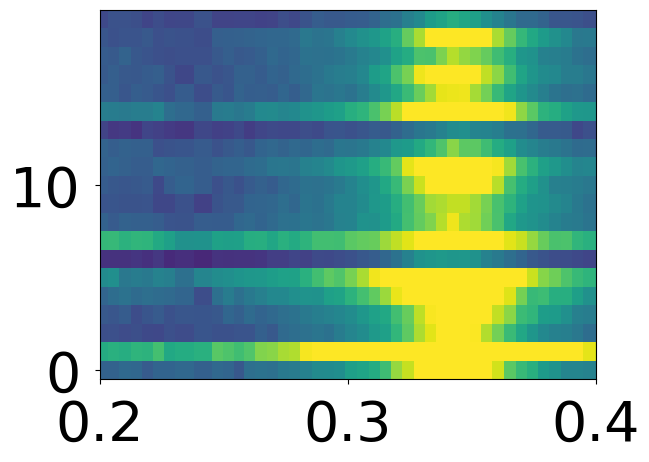

In [39]:
### Put analysis results into array downstream analysis/visualization
%matplotlib inline 
from matplotlib import colors as colors

plt.figure(10); plt.clf()
Iq_array= []
cmap = mpl.colormaps['jet']  #viridis, jet, hsv, PiYG
colors_custom = cmap(np.linspace(0.0, 1.0, len(line_sector)))
vertical_spacing = 2 #arbitrary

for nn, line in enumerate(line_sector):
    q_array = line_sector[nn].x    
    Iq_array.append(line_sector[nn].y)
    if (nn % 1) == 0:
#        plt.plot(q_array, Iq_array[nn] + nn*vertical_spacing/100, color=colors_custom[nn])
        plt.plot(q_array, Iq_array[nn], color=colors_custom[nn])
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.430)
plt.axvline(.850)
plt.show()
    
np_Iq_array = np.array(Iq_array)

plt.figure()
yaxis=np.arange(len(Iq_array))
plt.pcolormesh(q_array,yaxis,Iq_array,norm=colors.Normalize(vmin=1,vmax=100))
plt.xlim(.2,.4)
#plt.imshow(Iq_array)
plt.show()


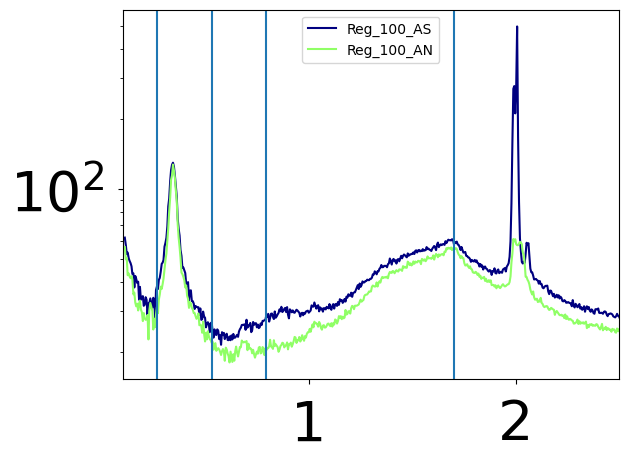

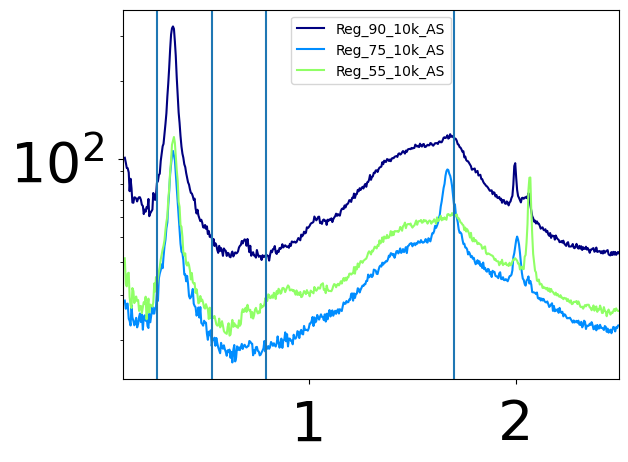

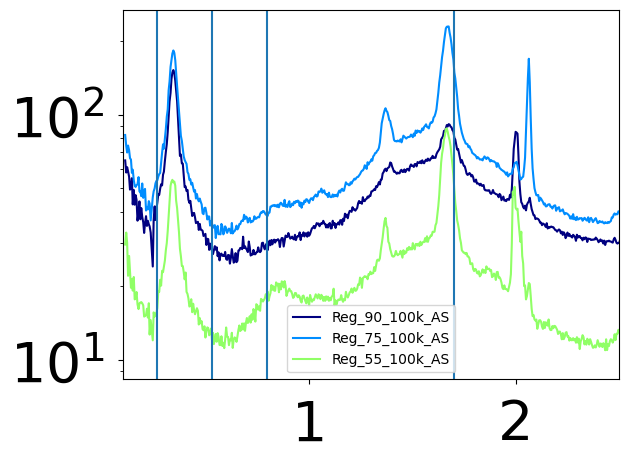

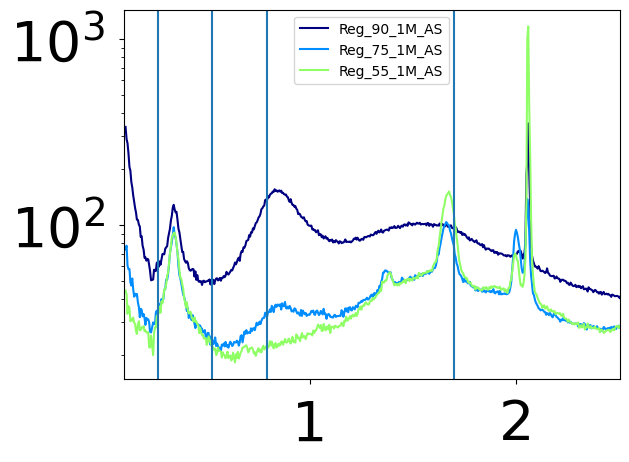

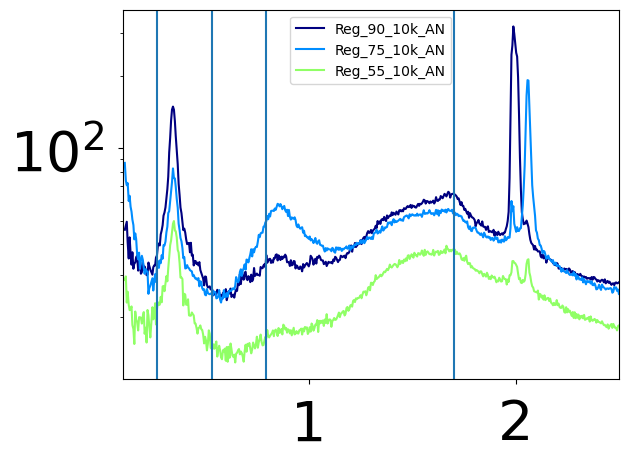

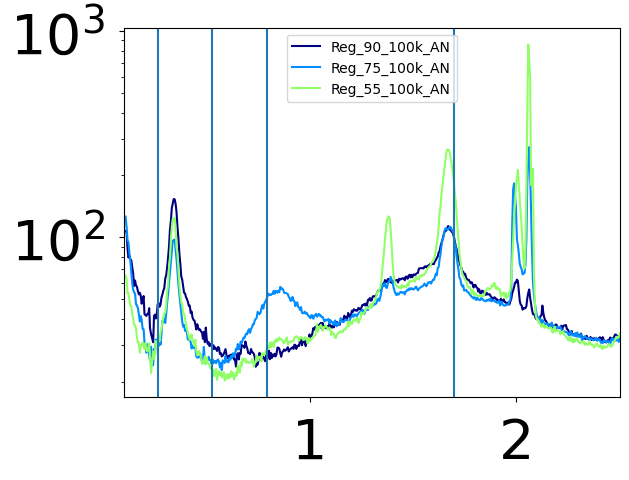

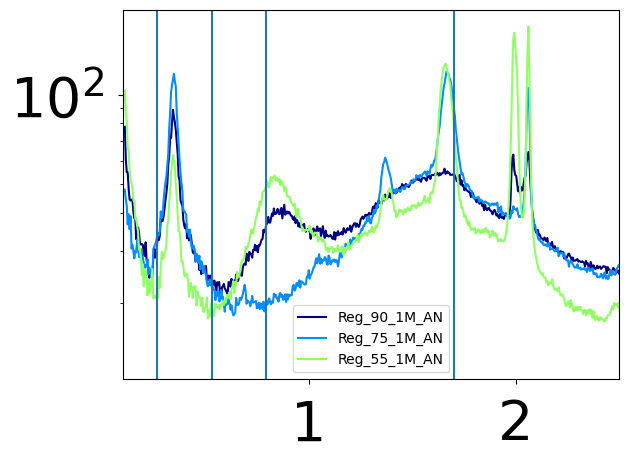

In [40]:
plt.figure()
plt.plot(q_array, Iq_array[0], color=colors_custom[0],label='Reg_100_AS')
plt.plot(q_array, Iq_array[10], color=colors_custom[10],label='Reg_100_AN')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[1], color=colors_custom[0],label='Reg_90_10k_AS')
plt.plot(q_array, Iq_array[2], color=colors_custom[5],label='Reg_75_10k_AS')
plt.plot(q_array, Iq_array[3], color=colors_custom[10],label='Reg_55_10k_AS')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[4], color=colors_custom[0],label='Reg_90_100k_AS')
plt.plot(q_array, Iq_array[5], color=colors_custom[5],label='Reg_75_100k_AS')
plt.plot(q_array, Iq_array[6], color=colors_custom[10],label='Reg_55_100k_AS')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[7], color=colors_custom[0],label='Reg_90_1M_AS')
plt.plot(q_array, Iq_array[8], color=colors_custom[5],label='Reg_75_1M_AS')
plt.plot(q_array, Iq_array[9], color=colors_custom[10],label='Reg_55_1M_AS')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[11], color=colors_custom[0],label='Reg_90_10k_AN')
plt.plot(q_array, Iq_array[12], color=colors_custom[5],label='Reg_75_10k_AN')
plt.plot(q_array, Iq_array[13], color=colors_custom[10],label='Reg_55_10k_AN')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[14], color=colors_custom[0],label='Reg_90_100k_AN')
plt.plot(q_array, Iq_array[15], color=colors_custom[5],label='Reg_75_100k_AN')
plt.plot(q_array, Iq_array[16], color=colors_custom[10],label='Reg_55_100k_AN')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()

plt.figure()
plt.plot(q_array, Iq_array[17], color=colors_custom[0],label='Reg_90_1M_AN')
plt.plot(q_array, Iq_array[18], color=colors_custom[5],label='Reg_75_1M_AN')
plt.plot(q_array, Iq_array[19], color=colors_custom[10],label='Reg_55_1M_AN')
plt.yscale('log')
plt.ylim()
plt.xlim(.1,2.5)
plt.axvline(.265)
plt.axvline(.530)
plt.axvline(.795)
plt.axvline(1.7)
plt.legend()
plt.show()
    
    


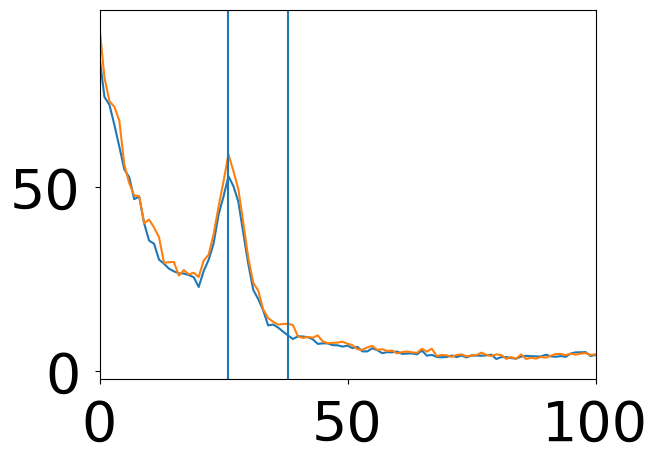

In [35]:
plt.figure()
plt.plot((Iq_array)[100])
plt.plot((Iq_array)[200])
plt.ylim()
plt.xlim(0,100)
plt.axvline(26)
plt.axvline(38)
#plt.imshow(Iq_array)
plt.show()

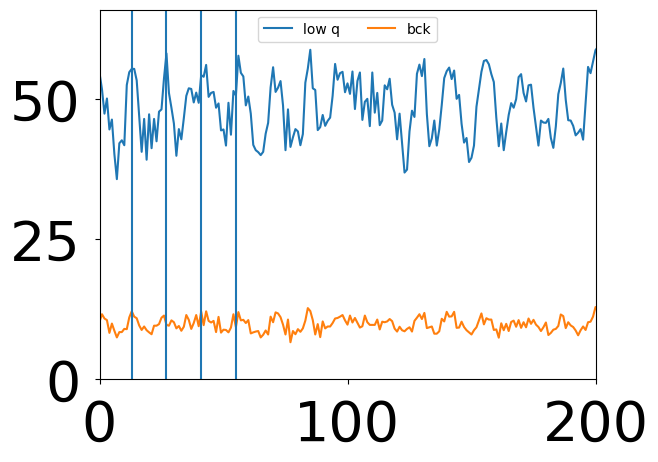

()
(6800, 553)


In [36]:
plt.figure()
plt.plot(np.transpose(Iq_array)[26],label='low q')
plt.plot(np.transpose(Iq_array)[38],label='bck')
plt.ylim(0)
plt.xlim(0,200)
plt.axvline(13)
plt.axvline(27)
plt.axvline(41)
plt.axvline(55)
#plt.imshow(Iq_array)
plt.legend(loc='upper center',ncol=2)
plt.show()
print(np.shape(line))
print(np.shape(Iq_array))

rerun in-plane

In [41]:
shortfiles=[]
for file in infiles:
    if 'try' not in file:
        shortfiles.append(file)

line_sector = [] ### CHANGE THIS
Nfile = len(shortfiles)
print(Nfile)

import time
t0 = time.time()

for ii, infile in enumerate(shortfiles):
    if np.mod(ii, 200)==0:
        print('[{:0.0f}%]'.format(ii/Nfile*100))
    #data = process.load(source_dir+infile+'_'+exp.det+'.tiff', calibration=calibration, mask=mask, run_args=run_args)
    
    data = process.load(infile, calibration=calibration, mask=mask, run_args=run_args)
    line_output = data.sector_average_q_bin(angle=75, dangle=15)  #line_output.x; line_output.y

    line_sector.append(line_output)

    
print('Done! Took {:.0f}s'.format(time.time()-t0)) 

912
[0%]
[22%]
[44%]
[66%]
[88%]
Done! Took 10s


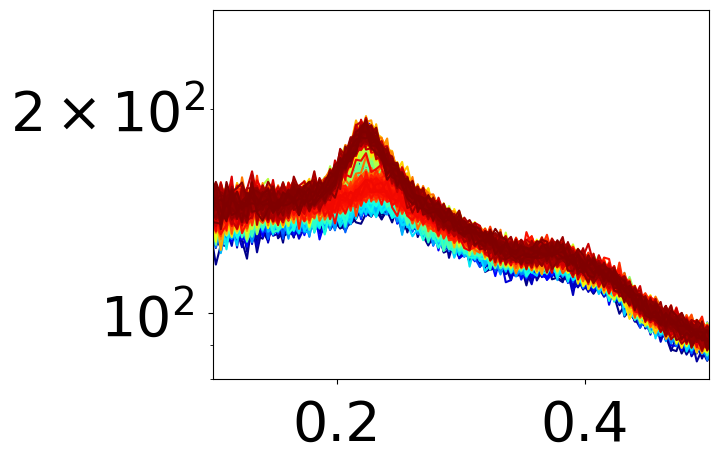

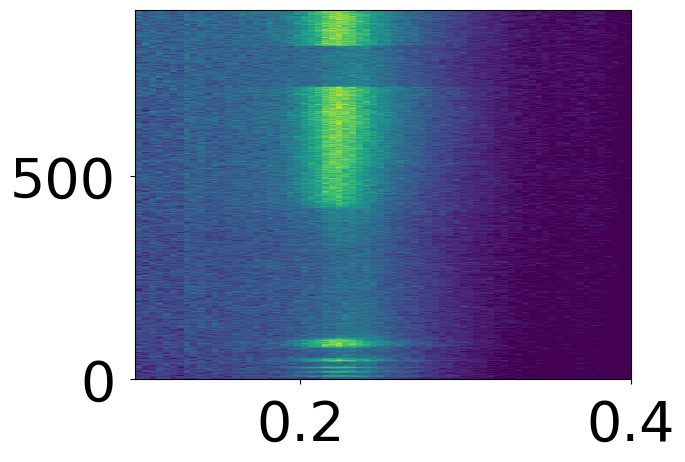

In [48]:
### Put analysis results into array downstream analysis/visualization

plt.figure(10); plt.clf()
Iq_array= []
cmap = mpl.colormaps['jet']  #viridis, jet, hsv, PiYG
colors_custom = cmap(np.linspace(0.0, 1.0, len(line_sector)))
vertical_spacing = 2 #arbitrary

for nn, line in enumerate(line_sector):
    q_array = line_sector[nn].x    
    Iq_array.append(line_sector[nn].y)
    if (nn % 1) == 0:
#        plt.plot(q_array, Iq_array[nn] + nn*vertical_spacing/100, color=colors_custom[nn])
        plt.plot(q_array, Iq_array[nn], color=colors_custom[nn])
plt.yscale('log')
plt.ylim(80,280)
plt.xlim(.1,.5)
#plt.axvline(.210)
#plt.axvline(.420)
plt.show()
    
np_Iq_array = np.array(Iq_array)

plt.figure()
yaxis=np.arange(len(Iq_array))
plt.pcolormesh(q_array,yaxis,Iq_array,norm=colors.Normalize(vmin=120,vmax=200))
plt.xlim(.1,.4)
#plt.imshow(Iq_array)
plt.show()